**Sentiment Analysis of IMDB Movie Reviews**

**Problem Statement:**

In this, we have to predict the number of positive and negative reviews based on sentiments by using different classification models.

Analyse the reviews in the IMDB dataset to perform:

1. Text cleaning - Perform all the steps in text cleaning

2. Text visuals - on the cleaned dataset obtain document detailed inferences for each of the visuals

	* word cloud 
	* bar graph of top 25 unigrams
	* bar graph of top 25 bigrams
    * bar graph of top 25 trigrams


3. Sentiment analysis and sentiment classification - use Vader to tag the sentiment scores as positive/negative

4. Document similarity - Find the documents similar to the document with the highest and lowest Vader score

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
import warnings
warnings.filterwarnings('ignore')


['Amzon_review_csv.xlsm', 'imdb_sentiment.csv', 'Takata_Recall.csv']


**Import the training dataset**

In [2]:
#importing the training data
imdb_data=pd.read_csv('./data/imdb_sentiment.csv')
print(imdb_data.shape)
imdb_data.head(10)

(748, 2)


,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


**Exploratery data analysis**

In [3]:
#Summary of the dataset
imdb_data.describe()

,sentiment
count,748.000000
mean,0.516043
std,0.500077
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


**Sentiment count**

In [4]:
#sentiment count
imdb_data['sentiment'].value_counts()

1    386
0    362
Name: sentiment, dtype: int64

We can see that the dataset is balanced.

**Classifying positive and negative reviews**

In [5]:
# Classifying the reviews column as 1 for 'positive' and 0 for 'negative'
imdb_classified = imdb_data

imdb_classified['sentiment'] = imdb_classified.apply(lambda x: 'negative' if x['sentiment'] == 0 else 'positive', axis=1)

# Chekcing the data after applying updates
imdb_classified.head(10)

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",negative
1,Not sure who was more lost - the flat characte...,negative
2,Attempting artiness with black & white and cle...,negative
3,Very little music or anything to speak of.,negative
4,The best scene in the movie was when Gerardo i...,positive
5,"The rest of the movie lacks art, charm, meanin...",negative
6,Wasted two hours.,negative
7,Saw the movie today and thought it was a good ...,positive
8,A bit predictable.,negative
9,Loved the casting of Jimmy Buffet as the scien...,positive


**Spliting the training dataset**

In [6]:
#split the dataset  
#train dataset
train_reviews = imdb_data.review[:550]
train_sentiments = imdb_data.sentiment[:550]
#test dataset
test_reviews = imdb_data.review[550:]
test_sentiments = imdb_data.sentiment[550:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(550,) (550,)
(198,) (198,)


**Text normalization**

In [7]:
# Tokenization of text
tokenizer = ToktokTokenizer()
# Setting English stopwords
stopword_list = nltk.corpus.stopwords.words('english')

**Removing html strips and noise text**

In [8]:
# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Apply function on review column
imdb_data['review'] = imdb_data['review'].apply(denoise_text)

**Removing special characters**

In [9]:
# Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

# Apply function on review column
imdb_data['review'] = imdb_data['review'].apply(remove_special_characters)

**Text stemming**

In [10]:
# Stemming the text
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

#Apply function on review column
imdb_data['review'] = imdb_data['review'].apply(simple_stemmer)

**Removing stopwords**

In [11]:
# Set stopwords to english
stop = set(stopwords.words('english'))
print(stop)

# Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

# Apply function on review column
imdb_data['review'] = imdb_data['review'].apply(remove_stopwords)

{"should've", 'y', 'himself', 'who', 'for', 'off', 'each', 't', 'wasn', 'more', 'weren', "didn't", 'by', 'both', 'is', 'because', 'this', 'that', 'than', 'during', 'were', 'hers', 'if', 'an', 'after', 'they', 'herself', 'yourself', 'such', 've', 'hasn', 'shouldn', 'a', 'there', 'having', 'doesn', 'these', "haven't", 'him', "needn't", 'don', 'all', 'other', 'i', "isn't", 'over', 'isn', 'did', "doesn't", 'ours', 'why', 'am', 'out', "it's", 'd', 'any', 'to', 'them', 'same', 'of', "you'll", 'yours', 'between', 'most', 'how', 'on', 'had', 'it', 'didn', 'should', 'once', 'mustn', 'been', 'while', 'which', 'theirs', 'but', 'down', 'under', "wasn't", 'our', "you'd", "couldn't", 'has', 'yourselves', 'she', 'themselves', 'myself', 'itself', 'into', 'not', 'have', 's', 'm', 'or', 'and', 're', 'until', 'at', 'haven', 'when', "mustn't", 'no', 'he', 'so', "won't", 'very', 'own', 'her', 'won', 'few', 'do', 'mightn', 'its', "aren't", "hadn't", 'some', "you've", "you're", "wouldn't", 'will', 'what', 't

**Normalized train reviews**

In [12]:
# Normalized train reviews
norm_train_reviews = imdb_data.review[:550]
norm_train_reviews[0]
#convert dataframe to string
norm_train_string = norm_train_reviews.to_string()
#Spelling correction using Textblob
norm_train_spelling = TextBlob(norm_train_string)
norm_train_spelling.correct()
#Tokenization using Textblob
norm_train_words = norm_train_spelling.words
norm_train_words

'veri veri veri slowmov aimless movi distress drift young man'

**Normalized test reviews**

In [13]:
# Normalized test reviews
norm_test_reviews = imdb_data.review[550:]
norm_test_reviews[550]
## Convert dataframe to string
norm_test_string = norm_test_reviews.to_string()
# Spelling correction using Textblob
norm_test_spelling = TextBlob(norm_test_string)
print(norm_test_spelling.correct())
# Tokenization using Textblob
norm_test_words = norm_test_spelling.words
norm_test_words

'im big fan thi seri mostli due ann rice style sensit treatment'

**Bags of words model**

It is used to convert text documents to numerical vectors or bag of words.

In [14]:
# Count vectorizer for bag of words
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

# Transformed train reviews
cv_train_reviews = cv.fit_transform(norm_train_reviews)

# Tnsformed test reviews
cv_test_reviews = cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (550, 10898)
BOW_cv_test: (198, 10898)


**Term Frequency-Inverse Document Frequency model (TFIDF)**

It is used to convert text documents to  matrix of  tfidf features.

In [15]:
# Tfidf vectorizer
tv = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

# Transformed train reviews
tv_train_reviews = tv.fit_transform(norm_train_reviews)

# Transformed test reviews
tv_test_reviews = tv.transform(norm_test_reviews)

print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (550, 10898)
Tfidf_test: (198, 10898)


**Labeling the sentiment text**

In [16]:
#labeling the sentient data
lb = LabelBinarizer()

# Transformed sentiment data
sentiment_data = lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(748, 1)


**Split the sentiment tdata**

In [17]:
#Spliting the sentiment data
train_sentiments = sentiment_data[:550]
test_sentiments = sentiment_data[550:]
print(train_sentiments.shape)
print(test_sentiments.shape)

(550, 1)
(198, 1)


**Modelling the dataset**

Let us build logistic regression model for both bag of words and tfidf features

In [18]:
# Training the model
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

# Fitting the model for Bag of words
lr_bow = lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)

# Fitting the model for tfidf features
lr_tfidf = lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


**Logistic regression model performane on test dataset**

In [19]:
#Predicting the model for bag of words
lr_bow_predict = lr.predict(cv_test_reviews)
print(lr_bow_predict)

# Predicting the model for tfidf features
lr_tfidf_predict = lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Accuracy of the model**

In [20]:
#Accuracy score for bag of words
lr_bow_score = accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

#Accuracy score for tfidf features
lr_tfidf_score = accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.3434343434343434
lr_tfidf_score : 0.31313131313131315


**Print the classification report**

In [21]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.31      1.00      0.48        59
    Negative       1.00      0.06      0.12       139

    accuracy                           0.34       198
   macro avg       0.66      0.53      0.30       198
weighted avg       0.80      0.34      0.23       198

              precision    recall  f1-score   support

    Positive       0.30      1.00      0.46        59
    Negative       1.00      0.02      0.04       139

    accuracy                           0.31       198
   macro avg       0.65      0.51      0.25       198
weighted avg       0.79      0.31      0.17       198



**Confusion matrix**

In [22]:
#confusion matrix for bag of words
cm_bow = confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf = confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[  9 130]
 [  0  59]]
[[  3 136]
 [  0  59]]


**Stochastic gradient descent or Linear support vector machines for bag of words and tfidf features**

In [23]:
#training the linear svm
svm = SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow = svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf = svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


**Model performance on test data**

In [24]:
#Predicting the model for bag of words
svm_bow_predict = svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict = svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Accuracy of the model**

In [25]:
#Accuracy score for bag of words
svm_bow_score = accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score = accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.3484848484848485
svm_tfidf_score : 0.32323232323232326


**Print the classification report**

In [26]:
#Classification report for bag of words 
svm_bow_report = classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report = classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.31      1.00      0.48        59
    Negative       1.00      0.07      0.13       139

    accuracy                           0.35       198
   macro avg       0.66      0.54      0.31       198
weighted avg       0.80      0.35      0.24       198

              precision    recall  f1-score   support

    Positive       0.31      1.00      0.47        59
    Negative       1.00      0.04      0.07       139

    accuracy                           0.32       198
   macro avg       0.65      0.52      0.27       198
weighted avg       0.79      0.32      0.19       198



**Plot the confusion matrix**

In [27]:
#confusion matrix for bag of words
cm_bow = confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf = confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[ 10 129]
 [  0  59]]
[[  5 134]
 [  0  59]]


**Multinomial Naive Bayes for bag of words and tfidf features**

In [28]:
# Training the model
mnb = MultinomialNB()
# Fitting the svm for bag of words
mnb_bow = mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
# Fitting the svm for tfidf features
mnb_tfidf = mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


**Model performance on test data**

In [29]:
#Predicting the model for bag of words
mnb_bow_predict = mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict = mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0]


**Accuracy of the model**

In [30]:
#Accuracy score for bag of words
mnb_bow_score = accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score = accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.3939393939393939
mnb_tfidf_score : 0.3686868686868687


**Print the classification report**

In [31]:
#Classification report for bag of words 
mnb_bow_report = classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report = classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.32      0.93      0.48        59
    Negative       0.85      0.17      0.28       139

    accuracy                           0.39       198
   macro avg       0.59      0.55      0.38       198
weighted avg       0.69      0.39      0.34       198

              precision    recall  f1-score   support

    Positive       0.31      0.93      0.47        59
    Negative       0.82      0.13      0.22       139

    accuracy                           0.37       198
   macro avg       0.57      0.53      0.35       198
weighted avg       0.67      0.37      0.30       198



**Plot the confusion matrix**

In [32]:
#confusion matrix for bag of words
cm_bow = confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf = confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[ 23 116]
 [  4  55]]
[[ 18 121]
 [  4  55]]


**Let us see positive and negative words by using WordCloud.**

**Word cloud for positive review words**

<function matplotlib.pyplot.show(close=None, block=None)>

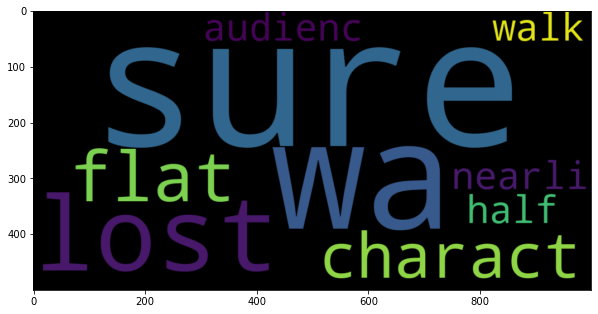

In [33]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text = norm_train_reviews[1]
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words = WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

**Word cloud for negative review words**

<function matplotlib.pyplot.show(close=None, block=None)>

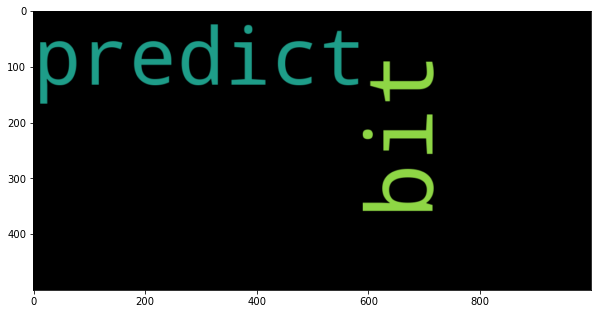

In [34]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text = norm_train_reviews[8]
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words = WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

**Conclusion:**
* We can observed that both logistic regression and multinomial naive bayes model performing well compared to linear support vector  machines.
* Still we can improve the accuracy of the models by preprocessing data and by using lexicon models like Textblob.

**Sentiment Analysis using vader**

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

imdb_classified['sentiment_score'] = imdb_classified['review'].apply(lambda x: compound_score(x)) # applying on the reviews column to get the score

imdb_classified.sample(5)

def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

imdb_classified['review_category'] = imdb_classified['sentiment_score'].apply(lambda x: sentiment_category(x))

imdb_classified.sample(5)

,review,sentiment,sentiment_score,review_category
434,ill give thi film 10 10,positive,-0.4215,negative
330,whatev prompt documentari beyond,negative,0.0000,neutral
587,love wa realli scari,positive,0.6369,positive
603,avoid cost,negative,-0.2960,negative
119,lead man charismafre,negative,0.0000,neutral


**Plotting Distribution Graph**

Text(0.5, 1.0, 'Distribution of Reviews Category')

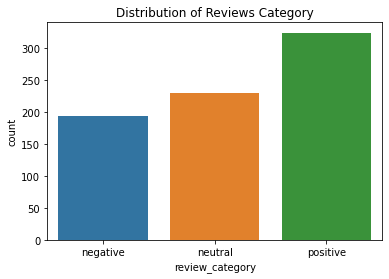

In [36]:
sns.countplot(imdb_classified['review_category']).set_title("Distribution of Reviews Category")

**Generating wordcloud for Positive and Negative reviews**

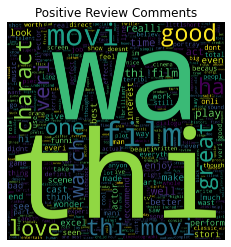

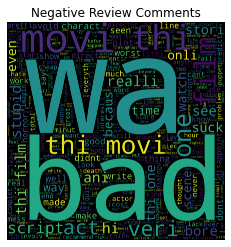

In [37]:
# Apply function on review column
imdb_classified['cleaned_reviews'] = imdb_classified['review'].apply(denoise_text)
imdb_classified['cleaned_reviews'] = imdb_classified['review'].apply(remove_special_characters)
imdb_classified['cleaned_reviews'] = imdb_classified['review'].apply(simple_stemmer)
imdb_classified['cleaned_reviews'] = imdb_classified['review'].apply(remove_stopwords)

positive_reviews = imdb_classified.loc[imdb_classified['review_category'] == 'positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

negative_reviews = imdb_classified.loc[imdb_classified['review_category'] == 'negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

def plot_wordclouds():
    from wordcloud import WordCloud
    pos_wordcloud = WordCloud(height=4000, width=4000, max_words=500, background_color='black', min_font_size=5)
    pos_wordcloud = pos_wordcloud.generate(' '.join(positive_reviews))
    plt.imshow(pos_wordcloud)
    plt.title("Positive Review Comments")
    plt.axis('off')
    plt.show()
    
    neg_wordcloud = WordCloud(height=4000, width=4000, max_words=500, background_color='black', min_font_size=5)
    neg_wordcloud = neg_wordcloud.generate(' '.join(negative_reviews))
    plt.imshow(neg_wordcloud)
    plt.title("Negative Review Comments")
    plt.axis('off')
    plt.show()

plot_wordclouds()

**Unigrams**

In [40]:
from collections import Counter
def get_most_common(reviews_list, topn=20):
    reviews = " ".join(reviews_list)
    tokenised_reviews = reviews.split(" ")
    freq_counter = Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

positive_reviews_top25 = get_most_common(positive_reviews, 25)
negative_reviews_top25 = get_most_common(negative_reviews, 25)

print("Top 25 Positive Reviews: ", positive_reviews_top25)
print("Top 25 Negative Reviews: ", negative_reviews_top25)

Top 25 Positive Reviews:  [('thi', 154), ('film', 113), ('movi', 108), ('1', 100), ('0', 100), ('wa', 95), ('good', 47), ('like', 44), ('one', 41), ('veri', 40), ('great', 37), ('charact', 36), ('ha', 35), ('love', 34), ('watch', 27), ('time', 24), ('play', 24), ('well', 23), ('best', 22), ('hi', 21), ('realli', 21), ('act', 21), ('enjoy', 18), ('make', 18), ('see', 18)]
Top 25 Negative Reviews:  [('thi', 76), ('movi', 61), ('wa', 53), ('bad', 52), ('0', 38), ('film', 35), ('one', 32), ('veri', 19), ('1', 19), ('act', 17), ('script', 16), ('stupid', 14), ('ani', 13), ('realli', 13), ('time', 13), ('like', 13), ('hi', 13), ('see', 12), ('bore', 12), ('even', 11), ('watch', 11), ('stori', 11), ('suck', 11), ('onli', 10), ('becaus', 10)]


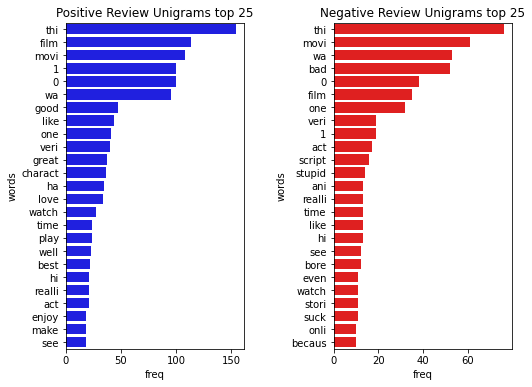

In [42]:
def plot_most_common_words(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words = get_most_common(reviews_list, topn=topn)
    data = pd.DataFrame()
    data['words'] = [val[0] for val in top_words]
    data['freq'] = [val[1] for val in top_words]
    if axis != None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title + " top " + str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title + " top " + str(topn))


from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6 # Sets the heigth and width of image
fig,ax = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) # Adjusts the space between the two plots
plot_most_common_words(positive_reviews,25,"Positive Review Unigrams",axis=ax[0])
plot_most_common_words(negative_reviews,25,"Negative Review Unigrams",color="red",axis=ax[1])

**Bigrams**

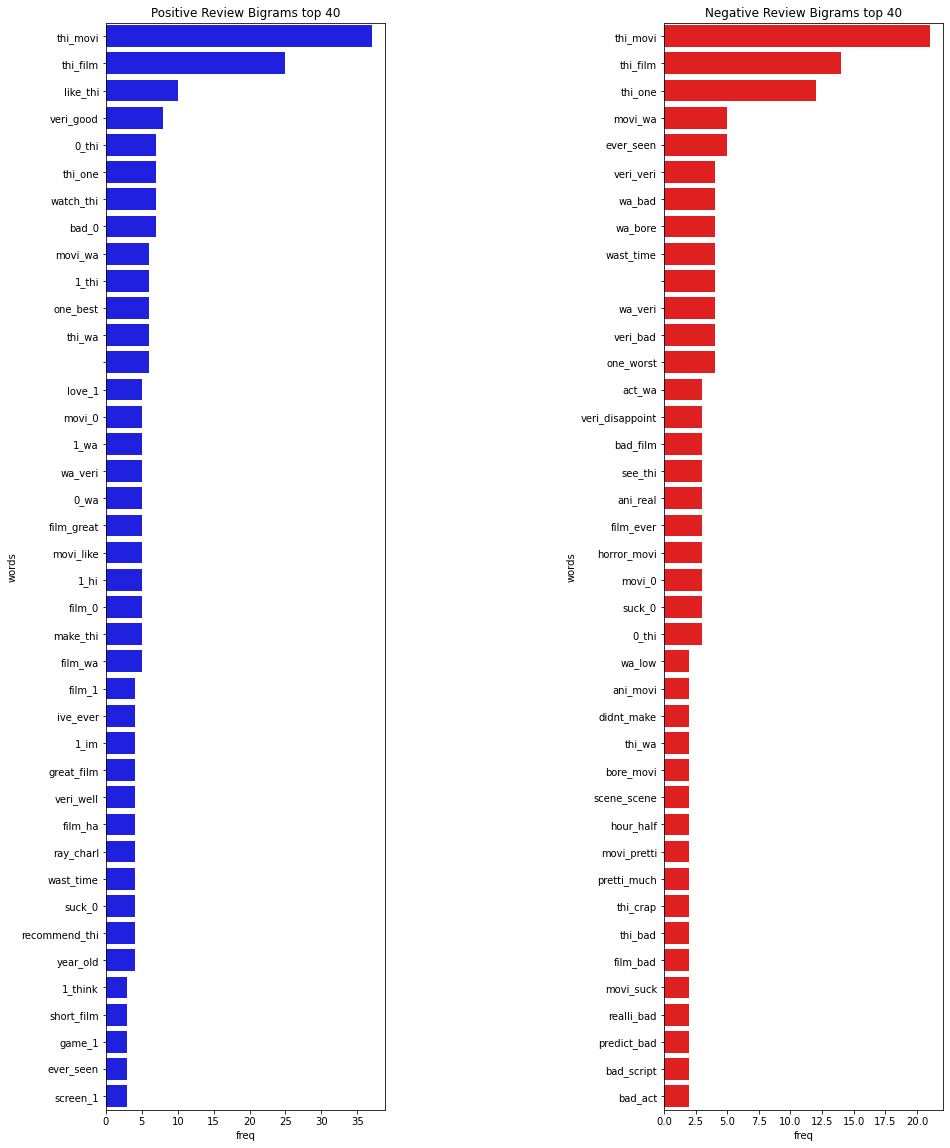

In [43]:
def generate_ngram(text,n):
    tokens = text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

positive_reviews_bigrams=[" ".join(generate_ngram(review,2)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generate_ngram(review,2)) for review in negative_reviews]

rcParams['figure.figsize'] = 15,20
fig,ax = plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plot_most_common_words(positive_reviews_bigrams,40,"Positive Review Bigrams",axis=ax[0])

plot_most_common_words(negative_reviews_bigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])